<!-- dom:TITLE: Decline Analysis of Oil field production data from the NCS -->
# Decline Analysis of Oil field production data from the NCS
<!-- dom:AUTHOR: Prepared as part of Python preparatory course -->
<!-- Author: -->  
**Prepared as part of Python preparatory course**

Date: **Aug 14, 2019**

**Summary.** In this exercise we will look closer at some of the data that is
available at the Norwegian Petroleum Department
([NPD](http://factpages.npd.no/factpages/Default.aspx?culture=no))
website. We will use simple models to analyze the production data
from some of the fields. Learning outcomes:
* read data from files, and visualize them

* use Python to automatically determine parameters in a mathematical model

* use a model to interpret observed production data

* get familiar with the NPD web site and some of the Norwegian oil fields. 



# Introduction to Decline Analysis
<div id="deca"></div>

An idealized behavior of an oil field is shown in the figure below, [[hook]](#hook).
On the web site
([NPD](http://factpages.npd.no/factpages/Default.aspx?culture=no)),
it is possible to select different type of Norwegian oil fields and
compare the historical production with that of
the figure below.
By selecting e.g. Norne or Draugen one can easily see similarities
with
the figure below.
The main differences might be the size of each of the phases, many of the fields does not have a clear plateau,
and the decline phase might be shorter or longer. In this problem we focus on the last phase of the
oil production; the decline. We define the decline rate $D$ as:

<!-- Equation labels as ordinary links -->
<div id="dec"></div>

$$
\begin{equation}
\lambda=-\frac{\frac{d q}{d t}}{q}=Cq^\beta\,.
\label{dec} \tag{1}
\end{equation}
$$

$q$ is the field oil rate, $C$ and $\beta$ are constants that needs to be
found by comparing the model to data.
<!-- dom:FIGURE: [fig-decline/hook.png, width=800] -->
<!-- begin figure -->

<p></p>
<img src="fig-decline/hook.png" width=800>

<!-- end figure -->




# Exercise 1: Import data into a database and access them

* Import data from  `field_production_gross_monthly.xls`,
  in the catalog or from the [NPD web site](http://factpages.npd.no/factpages/), into a database

* Extract production data from the Draugen field, and store them in a text file called
  `draugen.txt`. The format should be: `Year` (first column), `Month`
  (second column), and `OilProd` (third column).

* If you do not want to use databases: Simply open the file
  `field_production_gross_monthly.xls`, in the catalog or from the
  [NPD web site](http://factpages.npd.no/factpages/). Search in the
  Excel file after "Draugen", copy the data from all the rows relevant
  for Draugen (row 1623 to 1921) and paste it into a file (using
  e.g. notepad or some other text editor). Save the file as 'draugen.txt'. 

# Exercise 2: Importing and plotting data with Python


**Step 1.**
In the cell below, use the `loadtxt` function to load the data file
`draugen.txt` into an array. The data file should be saved to the same
folder as this notebook. Refer to the official documentation to
reference how to use this function if you are unfamiliar:
[loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

# Using Pandas to access data:

/Users/ah/github/CompEngineering/pub/projects/decline/notebook
WARNING *** file size (3071936) not 512 + multiple of sector size (512)


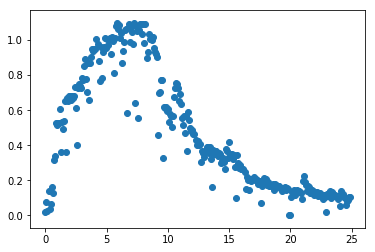

In [50]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
print(pathlib.Path.cwd())
folder = pathlib.Path.cwd().parent.joinpath('data')
filename = folder.joinpath('field_production_gross_monthly.xls')
df = pd.read_excel(filename)
columns = df.columns


fields = ['DRAUGEN']
#for field in fields:
#for i, field in enumerate(fields):
#    #field = fields[i]
for field in fields:
    df2 = df[df[df.columns[0]] == field]
    Year = df2['Year']
    Month = df2['Month']
    OilProd=df2[columns[3]]
    
    #Assume 30 days in each month and 365 in year
    Year = Year + Month*30/365
    ProdStart = Year.iloc[0]

    #Year now starts at 0
    Year = Year-ProdStart
    #print(Year)
    
    fig = plt.figure()
    plt.scatter(Year, OilProd)

    


In [68]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
print(pathlib.Path.cwd())
folder = pathlib.Path.cwd().parent.joinpath('data')
filename = folder.joinpath('field_production_gross_monthly.xls')
df = pd.read_excel(filename)
columns = df.columns
#print(columns)
#df.columns[0]
#df['Field (Discovery)']
#df[df[df.columns[0]] == 'DRAUGEN']

/Users/ah/github/CompEngineering/pub/projects/decline/notebook
WARNING *** file size (3071936) not 512 + multiple of sector size (512)


IndexError: too many indices for array

In [ ]:
import numpy as np
# import data from draugen.txt
B = np.loadtxt("draugen.txt")

Year = B[:,0]
Month = B[:,1]
OilProd = B[:,2]
#print(Year)

* Note: you can use *array slicing* to access the individual columns of a 2D array

**Step 2.**
It is more practical to have the production data to start at $t=0$. In
the following we will assume that you have organized the oil production
data from Draugen into Numpy arrays, e.g. `Year`, `Month`, and
`OilProd`.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#Assume 30 days in each month and 365 in year
Year = Year + Month*30/365
ProdStart = Year[0]

#Year now starts at 0
Year = Year-ProdStart

#Calculate the cumulative oil production
CumOilProd = ...

fig, ax1 = plt.subplots()

plt.title('Draugen production profile')
ax1.set_ylabel(r'MSm$^3$/month')
ax1.set_xlabel('Years of production')

ax1.plot(Year,OilProd, 'b--o')
ax2 = ax1.twinx() # second axes that shares the same x-axis
ax2.set_ylabel(r'Cumulative production [MSm$^3$]')
ax2.plot(Year,CumOilProd, 'r--o')
plt.show()

the figure below.


**Step 3.**
Compare your plot with the one that is reported under Draugen at the [NPD web site](http://factpages.npd.no/factpages/), why is it different?
<!-- dom:FIGURE: [fig-decline/draugen.png, width=800] <div id="fig:draugen"></div> -->
<!-- begin figure -->
<div id="fig:draugen"></div>

<p></p>
<img src="fig-decline/draugen.png" width=800>

<!-- end figure -->





**Step 4.**
 Get data from Norne, Oseberg Øst, and Jotun in the file and make similar plot for them, i.e. production rate and cumulative oil production vs years of production


**Step 5.**
For the same fields plot the production vs the cumulative production

# Exercise 3: Decline analysis, exponential case: $\beta=0$


**Step 1.**
Use equation ([1](#dec)), to show that the oil rate is:

<!-- Equation labels as ordinary links -->
<div id="eq:decline:exp"></div>

$$
\begin{equation}
q(t)=q_0\exp\{-\lambda_0 t\}.
\label{eq:decline:exp} \tag{2}
\end{equation}
$$

for $\beta=0$. 

Now we will use this model to analyze the production data from the fields in the previous exercise.

**Step 2.**
Define a function that calculates the production rate given in equation ([2](#eq:decline:exp)):

In [ ]:
def exp_decline(x,q0,lam):
# enter function here
  return ...

**Step 3.**
Next, we want to fit our model to the data. Python have several
functions to fit a model to data, we will use `curve_fit` from
[SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).
It is important to only use data from the decline phase (after approximately 8
years):

In [ ]:
from scipy.optimize import curve_fit
# only choose data from the decline phase (i.e. after approx. 8 years) 
T0 = 8
# extract indexes  
ind = Year > T0;
# cooresponding X and Y-value 
NewY = Year[ind]-T0; #important to start at 0
NewP = OilProd[ind];
# call the curve_fit function:
popt, pcov = curve_fit( ... ) # enter correct code
# evaluate function with the best fit and visual inspect the quality

A successful fit should produce a similar result as shown in the figure below.
<!-- dom:FIGURE: [fig-decline/draugen_fit.png, width=800] <div id="fig:draugen_fit"></div> -->
<!-- begin figure -->
<div id="fig:draugen_fit"></div>

<p></p>
<img src="fig-decline/draugen_fit.png" width=800>

<!-- end figure -->




**Step 4.**
Use data from Norne, Oseberg Øst, and Jotun, fit the model to the decline phase of the production. Report the values for the decline parameter, compare them. 

# Exercise 4: Decline analysis, hyperbolic case: $\beta\in <0,1>$


**Step 1.**
Use equation ([1](#dec)), to show that the oil rate is:

<!-- Equation labels as ordinary links -->
<div id="bet"></div>

$$
\begin{equation}
q(t)=q_0\left[\beta\lambda_0t+1\right]^{-1/\beta}
\label{bet} \tag{3}
\end{equation}
$$

for $\beta>0$. Note that $\lambda_0$ is the decline rate at $t=0$: $\lambda_0=Cq_0^\beta$.


**Step 2.**
Follow the procedure outlined in the previous exercise, but this time with equation ([3](#bet)). 
You need to make a new Python function, e.g.:

In [ ]:
def hyp_decline(x,A,D,b):
    return # enter function here

**Step 3.**
Use data from Norne, Oseberg Øst, and Jotun and fit the hyperbolic  model to the data. Report the values for the decline parameter. 
How does these values compare with the values you found for the exponential model? Which model is the best and why? 

**Observe:**

To fit a function to data is not straight forward. The result can be very sensitive to the initial guess of the variables, it also a good idea 
to constrain the values of the parameters. In our
case it is also important to choose the right starting point for the decline, for Draugen we used `T0=8`, for the Jotun field `T0=1.8` is a good value. 
We can force Python to constrain the parameters in `curve_fit`, by the
use of the `bounds` keyword.



# Exercise 5: The Jotun field, hyperbolic case: $\beta\in <0,1>$

In this exercise we will take a closer look at the Jotun field. Use the hyperbolic decline function with the parameters you found in the previous exercise.
The original drilling program of the Jotun field was finished in 2000. After producing the field for approximately 3 years, it was decided to drill 4 infill wells. 
By inspecting the Jotun production history, it is easy to spot an increase in the production rate around 2002-2003.  


**Step 1.**
Why can we use our decline model to estimate the production without the infill wells? 


**Step 2.**
Use the decline model to estimate the recovery at the end of 2017 (use e.g. the cumulative production). 
  Compare this recovery with the ultimate recovery from the field data.   


**Step 3.**
Assume an oil price of 50$\$$ per barrel, was it a good decision to drill these infill wells? (Hint: On the [NPD web site](http://factpages.npd.no/factpages/) you can
  find information about the  yearly field investments)

# Bibliography


1. <div id="hook"></div> **M. Hook, S. Davidsson, S. Johansson and X. Tang**. 
    Decline and depletion rates of oil production: a comprehensive investigation,
    *Phil. Trans. R. Soc. A*,
    372(20120448),
    2014.